In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

In [2]:
#columns = ['Value Date','Devises','month','quote','CV USD','Montants vendus en devises','Montants achetés en DZD','Moyenne des taux de change','Nombre de transactions interbancaires']

In [4]:
df = pd.read_excel('X:\RealTrf19.xlsx',index_col = 'Value Date', parse_dates = True )

In [5]:
df.head()

,Devises,month,quote,CV USD,Montants vendus en devises,Montants achetés en DZD,Moyenne des taux de change,Nombre de transactions interbancaires
Value Date,,,,,,,,
2018-12-27,CAD,12,119.1521,431650.62,587092.01,5.143208e+07,87.6048,1
2018-12-27,CHF,12,119.1521,85260.52,84797.95,1.015897e+07,11980.2067,1
2018-12-27,CHF,12,119.1521,19094.87,19020.50,2.275194e+06,11961.8004,1
2018-12-27,CNY,12,119.1521,996683.14,6934668.36,1.187569e+08,17.1251,1
2018-12-27,DKK,12,119.1521,137.03,899.50,1.632706e+04,1815.1261,1


In [6]:
df.shape

(14224, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14224 entries, 2018-12-27 to 2019-12-31
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Devises                                14224 non-null  object 
 1   month                                  14224 non-null  int64  
 2   quote                                  14224 non-null  float64
 3   CV USD                                 14224 non-null  float64
 4   Montants vendus en devises             14224 non-null  float64
 5   Montants achetés en DZD                14224 non-null  float64
 6   Moyenne des taux de change             14224 non-null  float64
 7   Nombre de transactions interbancaires  14224 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 944.6+ KB


In [8]:
df1 = df.copy()

In [18]:
df1 = df1.drop(['month', 'quote', 'Nombre de transactions interbancaires'], axis=1)

In [20]:
df1.head()

,Devises,CV USD,Montants vendus en devises,Montants achetés en DZD,Moyenne des taux de change
Value Date,,,,,
2018-12-27,CAD,431650.62,587092.01,5.143208e+07,87.6048
2018-12-27,CHF,85260.52,84797.95,1.015897e+07,11980.2067
2018-12-27,CHF,19094.87,19020.50,2.275194e+06,11961.8004
2018-12-27,CNY,996683.14,6934668.36,1.187569e+08,17.1251
2018-12-27,DKK,137.03,899.50,1.632706e+04,1815.1261


In [58]:
dev = df1.groupby('Devises').agg('max')

In [59]:
dev.head()

,CV USD,Montants vendus en devises,Montants achetés en DZD,Moyenne des taux de change
Devises,,,,
AED,3355132.14,1.240000e+07,3.997710e+08,32.8204
CAD,1635497.41,2.188401e+06,1.948730e+08,91.6660
CHF,24241788.96,2.410911e+07,2.888460e+09,12330.4577
CNY,15716553.05,1.055258e+08,1.872660e+09,17.8224
DKK,12223931.93,8.179141e+07,1.456507e+09,1818.2542


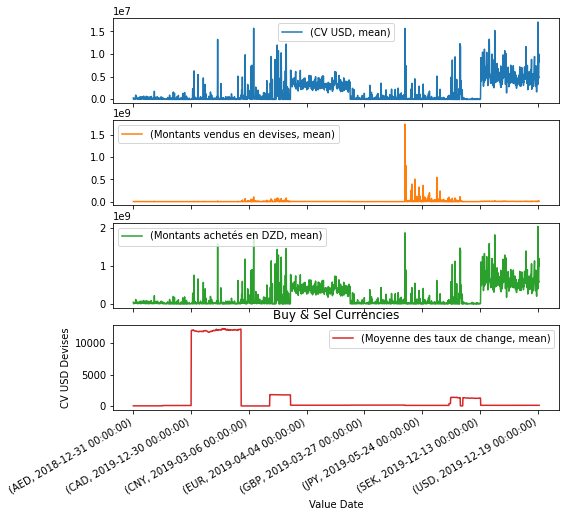

In [68]:
from matplotlib.pyplot import figure
df1.groupby(['Devises', 'Value Date']).agg(['mean']).plot(figsize=(8,8), subplots=True)

plt.xlabel('Value Date')
plt.ylabel('CV USD Devises')
plt.title('Buy & Sel Currencies')
plt.legend

plt.show()

\begin{equation*}
Y''+3Y'-Y+5X^3=0
\end{equation*}


In [70]:
product = {'month' : [1,2,3,4,5,6,7,8,9,10,11,12],'demand':[290,260,288,300,310,303,329,340,316,330,308,310]}

In [71]:
df = pd.DataFrame(product)

In [72]:
df.head()

,month,demand
0,1,290
1,2,260
2,3,288
3,4,300
4,5,310


In [73]:
for i in range(0,df.shape[0]-2):
    df.loc[df.index[i+2],'SMA_3'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

In [74]:
df.head()

,month,demand,SMA_3
0,1,290,NaN
1,2,260,NaN
2,3,288,279.3
3,4,300,282.7
4,5,310,299.3


In [75]:
df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

In [76]:
df.head()

,month,demand,SMA_3,pandas_SMA_3
0,1,290,NaN,NaN
1,2,260,NaN,NaN
2,3,288,279.3,279.333333
3,4,300,282.7,282.666667
4,5,310,299.3,299.333333


In [77]:
for i in range(0,df.shape[0]-3):
    df.loc[df.index[i+3],'SMA_4'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1]+df.iloc[i+3,1])/4),1)

In [78]:
df.head()

,month,demand,SMA_3,pandas_SMA_3,SMA_4
0,1,290,NaN,NaN,NaN
1,2,260,NaN,NaN,NaN
2,3,288,279.3,279.333333,NaN
3,4,300,282.7,282.666667,284.5
4,5,310,299.3,299.333333,289.5


In [79]:
df['pandas_SMA_4'] = df.iloc[:,1].rolling(window=4).mean()

In [80]:
df.head()

,month,demand,SMA_3,pandas_SMA_3,SMA_4,pandas_SMA_4
0,1,290,NaN,NaN,NaN,NaN
1,2,260,NaN,NaN,NaN,NaN
2,3,288,279.3,279.333333,NaN,NaN
3,4,300,282.7,282.666667,284.5,284.5
4,5,310,299.3,299.333333,289.5,289.5


In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

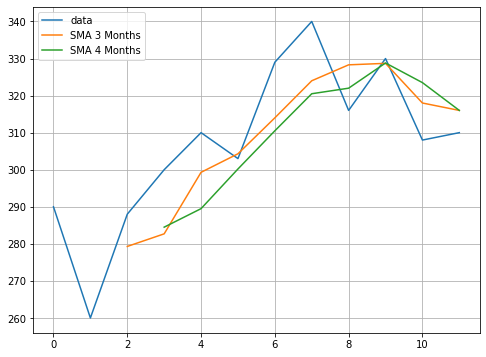

In [84]:
plt.figure(figsize=[8,6])
plt.grid(True)
plt.plot(df['demand'],label='data')
plt.plot(df['SMA_3'],label='SMA 3 Months')
plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

In [87]:
df = pd.read_csv(r'C:\Users\Administrateur\Downloads\AirQualityUCI\AirQualityUCI.csv', sep = ";", decimal = ",")
df = df.iloc[ : , 0:14]

In [88]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6


In [89]:
df.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
dtype: int64

In [90]:
df.dropna(inplace=True)

In [91]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
dtype: int64

In [92]:
df_T = pd.DataFrame(df.iloc[:,-2])

In [93]:
df_T.head()

,T
0,13.6
1,13.3
2,11.9
3,11.0
4,11.2


In [94]:
df_T['CMA_4'] = df_T.expanding(min_periods=4).mean()

In [95]:
df_T.head(10)

,T,CMA_4
0,13.6,NaN
1,13.3,NaN
2,11.9,NaN
3,11.0,12.450000
4,11.2,12.200000
5,11.2,12.033333
6,11.3,11.928571
7,10.7,11.775000
8,10.7,11.655556
9,10.3,11.520000


In [96]:
import datetime

df['DateTime'] = (df.Date) + ' ' + (df.Time)
df.DateTime = df.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))

In [97]:
df_T.index = df.DateTime

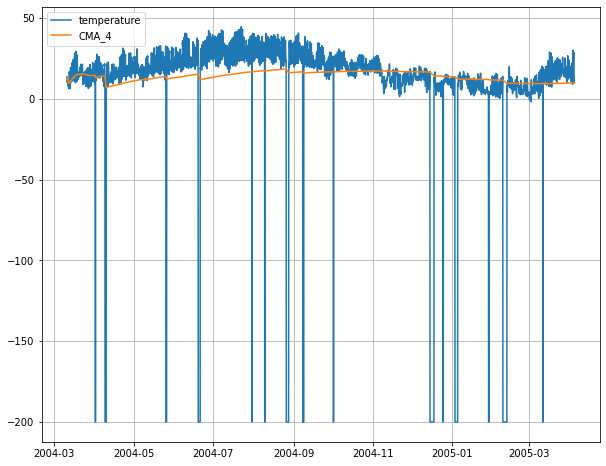

In [99]:
plt.figure(figsize=[10,8])
plt.grid(True)
plt.plot(df_T['T'],label='temperature')
plt.plot(df_T['CMA_4'],label='CMA_4')
plt.legend(loc=2)